### Pytorch
**PyTorch** is an open-source machine learning library developed by Facebook. It provides a flexible and dynamic computational graph, allowing developers to define and modify neural networks during runtime. **Tensors** are the central data abstraction in PyTorch. It is a multi-dimensional array, a generalization of vectors and matrices to higher dimensions   
<p style="text-align:center;"><img src='../media/imgs/PyTorch-Tensors.jpg' width='50%'/></p>  

### Cuda
Deep learning involves performing matrix multiplications and other linear algebra operations, which can be parallelized across the many cores available on a GPU. GPUs are designed to handle parallel processing tasks efficiently, making them significantly faster than CPUs for certain types of operations common in deep learning. **CUDA** (Compute Unified Device Architecture) is a parallel computing platform and programming model developed by NVIDIA for utilizing the computational power of GPUs. It allows developers to use NVIDIA GPUs for general-purpose processing (not just graphics-related tasks) by providing a parallel computing architecture.  

Intro to CUDA by NVIDIA: https://www.youtube.com/watch?v=IzU4AVcMFys



#### Why Pytorch  ?
Widely used in the industry and particularly in research, https://paperswithcode.com/trends shows the growth of PyTorch's usage in the industry compared to similar frameworks such as TensorFlow


#### PyTorch Vs. Tensorflow  

TensorFlow uses a static computational graph, meaning the graph is defined and then executed. PyTorch uses a dynamic computational graph, allowing for more flexibility in model architecture and easier debugging. This dynamic nature is particularly beneficial for researchers and developers experimenting with new ideas. PyTorch is valued for its flexibility, ease of use, and the ability to seamlessly transition between research prototyping and production deployment.

### Import

In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(torch.__version__)

2.1.0+cu121


### Check if pytorch is using GPU "GeForce GTX 1060"

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

assert torch.cuda.get_device_name(0) == "NVIDIA GeForce GTX 1650 Ti with Max-Q Design"

!nvidia-smi

Wed May 29 12:18:56 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.85                 Driver Version: 555.85         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   68C    P0             14W /   35W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Pytorch project #1

### Prepare data

In [3]:
train = datasets.MNIST("../../dataset/", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("../../dataset/", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 8068833.05it/s]


Extracting ../../dataset/MNIST\raw\train-images-idx3-ubyte.gz to ../../dataset/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 276315.06it/s]


Extracting ../../dataset/MNIST\raw\train-labels-idx1-ubyte.gz to ../../dataset/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 2519567.91it/s]


Extracting ../../dataset/MNIST\raw\t10k-images-idx3-ubyte.gz to ../../dataset/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2262533.11it/s]


Extracting ../../dataset/MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../dataset/MNIST\raw



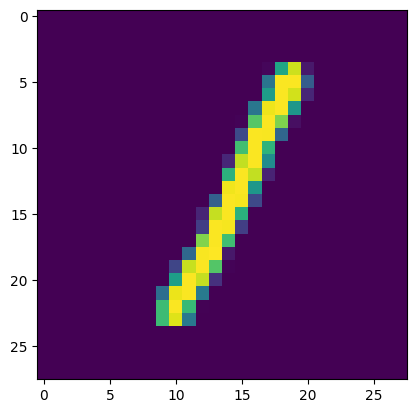

In [4]:
# data is a tensor object containing (is a single batch)
# first tensor holds the images, the second one holds the 
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

for data in trainset:
    img = data[0][0]
    break

show(img)

### Build NN

In [5]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)  # input img 28*28
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

# print the network architecture
net = Net().to(device)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


### Training

In [6]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        x, y = data
        x, y = x.to(device), y.to(device)

        # sets gradients to 0 before loss calc
        net.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0152, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1736, device='cuda:0', grad_fn=<NllLossBackward0>)


### Evaluation

In [7]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        x, y = data
        x, y = x.to(device), y.to(device)
        output = net(x.view(-1,784))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.974


### Pytorch project #2
https://github.com/mrdbourke/pytorch-deep-learning